# ISM / Confocal image processing for fluorescence lifetime reconstruction. TTM acquisition 

### Data Loading and Phasors calculation on ISM image's (Nx, Ny) pixels

In [1]:
import h5py
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np
import brighteyes_ism.analysis.Graph_lib as gr
import brighteyes_ism.dataio.mcs as mcs


In [2]:
with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\convallaria_03_07_2024.h5","a") as f:
    
     print(f.keys())
     data_input = f["dataset_1"]  

     brighteyes_flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\convallaria_03_07_2024.h5", data_input = data_input) 

<KeysViewHDF5 ['dataset_1']>


c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\flism.py:383: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(1024, 1024)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

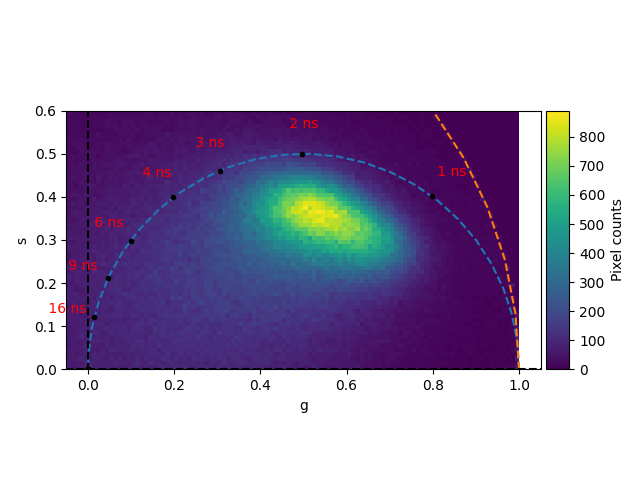

In [12]:
# Display the pixels'histogram-associated phasors in the phasor plot

%matplotlib widget

hf_phasors_per_pixel = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\convallaria_03_07_2024_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel.keys())

phasors_pix = hf_phasors_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel
#fasors_pix[1:100, 1:100]
print(phasors_pix.shape)

brighteyes_flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False, quadrant='first', dfd_freq = 80e6)

### Sum over the time bin and channel dimensions to get the intensity (Nx x Ny) image

<KeysViewHDF5 ['dataset_1']>
(1024, 1024)


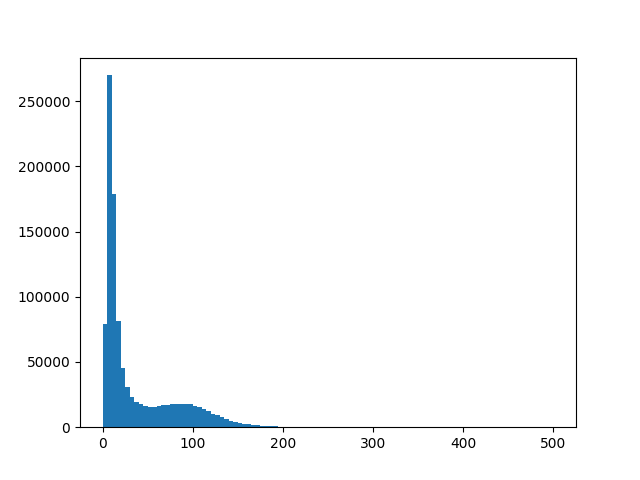

In [13]:

with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\convallaria_03_07_2024.h5","a") as f:
    
        print(f.keys())
        data_input = f["dataset_1"]
        
        data_histograms = np.sum(data_input, axis = (2, 3))
        print(data_histograms.shape)
    
# Plot the histogram of the photon counts in each pixel to see the distribution (e.g. check the level of noise) 
        plt.figure()
        plt.hist(data_histograms.flatten(), bins = 100, range = (0, 500))

# Lifetime Analysis 

#### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f = dfd frequency or laser rep rate frequency):
#### τφ = (1/(2πf)) * tan(φ)
#### φ = arctan(s/g)
#### g = Re{phasors_pix}
#### s = Im{phasors_pix}

In [15]:
# Calculate the single pixels' tau (fluorescence lifetime) values from the phasors of each pixel 

tau_phi = brighteyes_flim.calculate_tau_phi(np.real(phasors_pix[:]), np.imag(phasors_pix[:]), dfd_freq = 80e6)
print(tau_phi.shape)


(1024, 1024)


#### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f = dfd frequency or laser rep rate frequency):
#### τ<sub>m</sub> = (1/2*π*f) * √(1/m<sup>2</sup> - 1)
#### m = √g<sup>2</sup> + s<sup>2</sup>
#### g = Re{phasor_corrected}
#### s = Im{phasor_corrected}

In [17]:
tau_m = brighteyes_flim.calculate_tau_m(np.real(phasors_pix), np.imag(phasors_pix), dfd_freq = 80e6)
print(tau_m.shape)

(1024, 1024)


### Visualize histograms of tau distribution in the pixels

(array([  1921.,   2209.,   2368.,   2667.,   2964.,   3379.,   3773.,
          4077.,   4883.,   5785.,   6483.,   7571.,   9026.,  11012.,
         13158.,  16497.,  20380.,  26420.,  34385.,  46822.,  80555.,
        145480., 152175., 119386.,  73446.,  42726.,  27186.,  18974.,
         14226.,  11256.,   8815.,   7346.,   6214.,   5280.,   4508.,
          4004.,   3421.,   3163.,   2740.,   2348.,   2235.,   2081.,
          1796.,   1720.,   1488.,   1407.,   1403.,   1188.,   1115.,
          1020.]),
 array([-6.  , -5.68, -5.36, -5.04, -4.72, -4.4 , -4.08, -3.76, -3.44,
        -3.12, -2.8 , -2.48, -2.16, -1.84, -1.52, -1.2 , -0.88, -0.56,
        -0.24,  0.08,  0.4 ,  0.72,  1.04,  1.36,  1.68,  2.  ,  2.32,
         2.64,  2.96,  3.28,  3.6 ,  3.92,  4.24,  4.56,  4.88,  5.2 ,
         5.52,  5.84,  6.16,  6.48,  6.8 ,  7.12,  7.44,  7.76,  8.08,
         8.4 ,  8.72,  9.04,  9.36,  9.68, 10.  ]),
 <BarContainer object of 50 artists>)

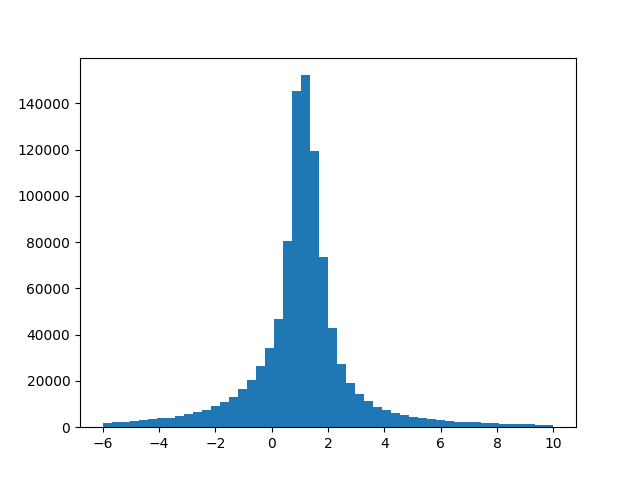

In [18]:
# Plot the distribution of tau values in all the pixels of the image 
tau_data = 1e9*tau_phi.flatten()

plt.figure()
plt.hist(tau_data, range = (-6, 10), bins = 50)

(array([  7084.,   3060.,   4475.,   6817.,  12071.,  27449.,  56426.,
         86660., 100673.,  95591.,  80932.,  64886.,  52192.,  43452.,
         36825.,  31723.,  27765.,  24701.,  22222.,  19609.,  17878.,
         16367.,  14537.,  13119.,  11773.,  10687.,   9731.,   8795.,
          8088.,   7447.,   6833.,   6271.,   5911.,   5366.,   5101.,
          4692.,   4391.,   4017.,   3636.,   3654.,   3202.,   3162.,
          2760.,   2537.,   2536.,   2355.,   2243.,   2051.,   2005.,
          1871.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

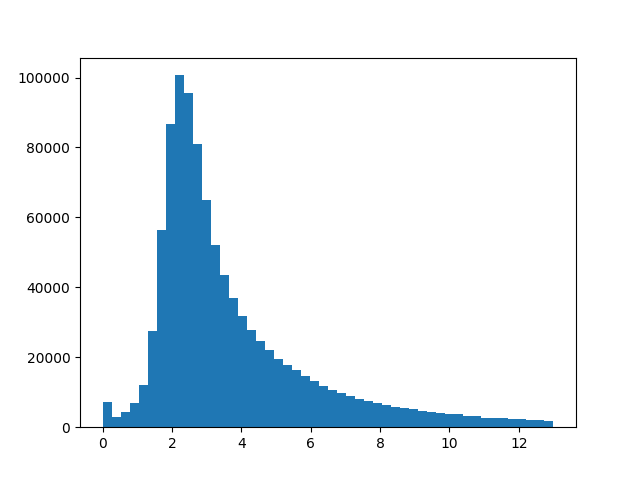

In [19]:
tau_m_data = 1e9*tau_m.flatten()

plt.figure()
plt.hist(tau_m_data, range = (0, 13), bins = 50)

### Filter the image with a thresholding Otsu algorithm to select the pixels with a minimum number of photons

In [27]:
# Process the histograms in each pixel to remove the pixels with a low amount of signal

# We want to process the histogram counts matrix and the tau matrix 
# to check if the pixels with high counts have only tau positives 

from skimage.filters import threshold_otsu as otsu
histograms_filtered = otsu(image=data_histograms, nbins=50)
print(histograms_filtered)
hist_indexes = np.argwhere(data_histograms > 70)
histogram_denoised = data_histograms[hist_indexes[:, 0], hist_indexes[:, 1]]
print(histogram_denoised.shape)
print(hist_indexes.shape)

393.57
(219146,)
(219146, 2)


[ 1.59702023e-09  1.43731470e-09  1.88898657e-09 ...  2.28844433e-09
  1.46531890e-09 -1.45878410e-07]


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 4.7000e+01, 2.4600e+02, 1.3020e+03, 4.4700e+03,
        1.0074e+04, 1.6229e+04, 1.9874e+04, 2.1385e+04, 2.1582e+04,
        2.1653e+04, 2.0860e+04, 1.9059e+04, 1.5971e+04, 1.2819e+04,
        9.6540e+03, 6.9340e+03, 5.0500e+03, 3.4800e+03, 2.4790e+03,
        1.6920e+03, 1.1900e+03, 8.4200e+02, 5.8700e+02, 4.4400e+02,
        3.0300e+02, 2.0900e+02, 1.5700e+02, 1.2500e+02, 9.8000e+01,
        6.8000e+01, 5.0000e+01, 4.7000e+01, 3.1000e+01, 2.8000e+01,
        2.3000e+01, 9.0000e+00, 1.7000e+01, 7.0000e+00, 1.3000e+01,
        5.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

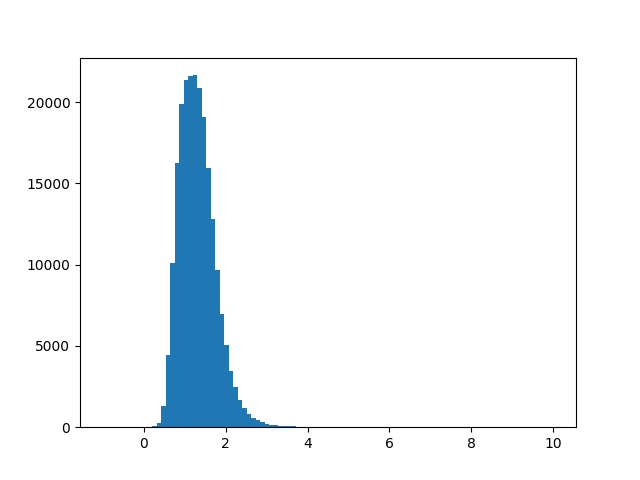

In [21]:
# Select the tau only from the pixels having a sufficient amount of photons, 
# identified applying an image thresholding method (e.g., Otsu's method).

tau_phi_denoised = tau_phi[hist_indexes[:, 0], hist_indexes[:, 1]]
print(tau_phi_denoised)
plt.figure()
plt.hist(1e9*tau_phi_denoised, bins = 100, range = (-1, 10))


(219146,)


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 5.4000e+01, 2.4100e+02,
        7.9200e+02, 2.0340e+03, 4.0750e+03, 7.1030e+03, 1.0627e+04,
        1.4168e+04, 1.6891e+04, 1.9020e+04, 2.0247e+04, 2.0125e+04,
        1.8695e+04, 1.6895e+04, 1.4477e+04, 1.2298e+04, 9.8910e+03,
        7.8530e+03, 5.9770e+03, 4.6300e+03, 3.4080e+03, 2.5240e+03,
        1.8600e+03, 1.3410e+03, 1.0340e+03, 7.4600e+02, 5.7600e+02,
        3.8900e+02, 2.8100e+02, 2.2100e+02, 1.6200e+02, 1.0900e+02,
        9.2000e+01, 7.4000e+01, 5.8000e+01, 3.3000e+01, 1.9000e+01,
        2.1000e+01, 2.7000e+01, 1.2000e+01, 1.1000e+01, 1.5000e+01,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.00

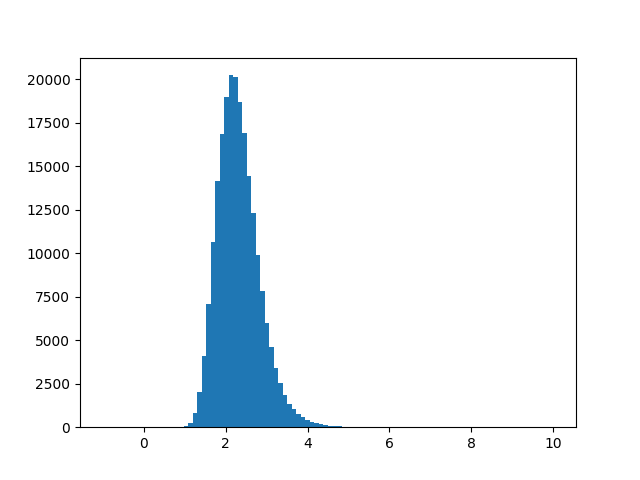

In [28]:
# Select the tau only from the pixels having a sufficient amount of photons, 
# identified applying an image thresholding method (e.g., Otsu's method).

tau_m_denoised = tau_m[hist_indexes[:, 0], hist_indexes[:, 1]]
print(tau_m_denoised.shape)
plt.figure()
plt.hist(1e9*tau_m_denoised, bins = 100, range = (-1, 10))


### Display and save the FLIM image representing the lifetime and intensity with a 2D colormap

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:656: RuntimeWarning: invalid value encountered in cast
  idx = (np.floor((variable - self.var_bounds[0]) / (self.var_bounds[1] - self.var_bounds[0]) * N)).astype(int)


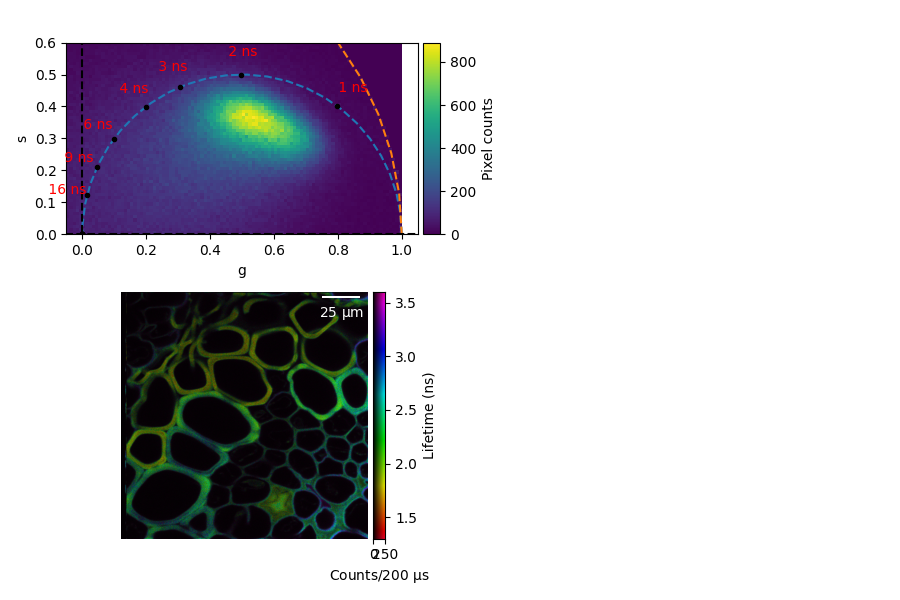

In [36]:
fig = plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
brighteyes_flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False, quadrant='first', fig = fig, ax = ax1, dfd_freq = 80e6)
gr.show_flim(data_histograms, tau_m*1e9, pxsize = 0.16, pxdwelltime = 200, lifetime_bounds = (1.3, 3.6), intensity_bounds = (0, 250),
             fig = fig, ax = ax2)  
fig.tight_layout()
plt.savefig(r"C:\Users\fdelbufalo\Desktop\PDF_processed_images\convallaria_03_07_2024_TTM.pdf", dpi = 900)